In [288]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import math
import copy
import pandas as pd
from pymop.factory import get_problem, get_uniform_weights
from utils import matr_add_diff_size, extract_median_front
from pymoo.factory import get_problem, get_reference_directions
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

In [289]:
def data_from_json(name):
    data = []
    #Each line in the json is an evolutionary run
    with open(name, 'r') as fp:

        for levels_json in fp:
            if levels_json != "\n":
                di = json.loads(levels_json)
                data.append(di)
    return data

def plot_mat_3d(mats, title, sup_title, save_fig = False):
    fig = plt.figure()
    fig.suptitle(sup_title, fontsize=16)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    for mat in mats:
        xs = mat[:, 0]

        ys = mat[:, 1]

        zs = mat[:, 2]

        ax.scatter(xs,ys,zs)
    if save_fig:
        plt.savefig(f"{title}-{sup_title}.png")
    plt.show()
    
def plot_mat_2d_lines(mats, title, sup_title):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    fig.suptitle(sup_title, fontsize=16)
    ax = fig.add_subplot(111)
    ax.set_title(title)
    for j in range(len(mats[1])):
        x = [0, 2*mats[1][j, 0]]
        y = [0, 2*mats[1][j, 1]]
        #ax.scatter(x,y,z)
        ax.plot(x, y, color='red')

    for mat in mats:


        xs = mat[:, 0]

        ys = mat[:, 1]


        ax.scatter(xs,ys, s=10)
    plt.show()
    
def plot_mat_2d(mats, title, sup_title, labels = [], save_fig = False):
    # plt.rcParams["figure.figsize"] = [7.50, 3.50]
    # plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    fig.suptitle(sup_title, fontsize=16)
    ax = fig.add_subplot(111)
    ax.set_title(title)

    for i, mat in enumerate(mats):
        if len(labels) != 0 and mat.shape[0] == 1:
            ax.scatter(mat[:,0], mat[:,1])
            ax.annotate(labels[i], (mat[:,0], mat[:,1]))
        elif len(labels) != 0:
            xs = mat[:, 0]
            ys = mat[:, 1]
            ax.scatter(xs, ys, label = labels[i] )

        else:
            xs = mat[:, 0]
            ys = mat[:, 1]
            ax.scatter(xs, ys)

    ax.legend()
    if save_fig:
        plt.savefig(f"{title}-{sup_title}.png")
    plt.show()
    
def multiplot_2d(mats, title, sup_title, x_axis_label, y_axis_label, labels = [], save_fig = False):
    # plt.rcParams["figure.figsize"] = [7.50, 3.50]
    # plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    fig.suptitle(sup_title, fontsize=16)
    ax = fig.add_subplot(111)
    ax.set_title(title)

    for i, mat in enumerate(mats):
        if len(labels) != 0:
            xs = mat[:, 0]
            ys = mat[:, 1]
            ax.plot(xs, ys, label = labels[i] )

        else:
            xs = mat[:, 0]
            ys = mat[:, 1]
            ax.plot(xs, ys)

    ax.legend()
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    if save_fig:
        plt.savefig(f"{title}-{sup_title}.png")
    plt.show()

In [290]:
data1 = data_from_json('analytics.json')
data2 = data_from_json('analytics-sms-emoa.json')[3:]

In [291]:
#Integra ejecuciones de SMS-EMOA con todas las demas
for i in range(len(data2)):
    for k in data2[i].keys():
        data1[i][k] = copy.deepcopy(data2[i][k])

In [292]:

merged_data = {}
merged_data_pareto = {}
#initializing values of dictionary
for k1 in data1[0].keys():
    merged_data[k1] = []
    merged_data_pareto[k1] = []
for k1 in data1[0].keys():
    for i in range(len(data1)):
        merged_data[k1] += [data1[i][k1]["hyper_volumes"]]
        merged_data_pareto[k1] += [data1[i][k1]["fronts"][-1]]
    merged_data[k1] = np.array(merged_data[k1])

In [293]:
medians = {}
for k in merged_data.keys():
    x = np.arange(1, merged_data[k].shape[1] + 1)    
    x = x.reshape(x.shape[0], 1)
    minimum = np.min(merged_data[k], axis = 0)
    minimum = minimum.reshape(minimum.shape[0], 1)
    minimum = np.concatenate((x, minimum), axis = 1)
    maximum = np.max(merged_data[k], axis = 0)
    maximum = maximum.reshape(maximum.shape[0], 1)
    maximum = np.concatenate((x, maximum), axis = 1)
    median = np.median(merged_data[k], axis = 0)
    median = median.reshape(median.shape[0], 1)
    median = np.concatenate((x, median), axis = 1)
    medians[k] = [minimum, median, maximum]

<IPython.core.display.Javascript object>


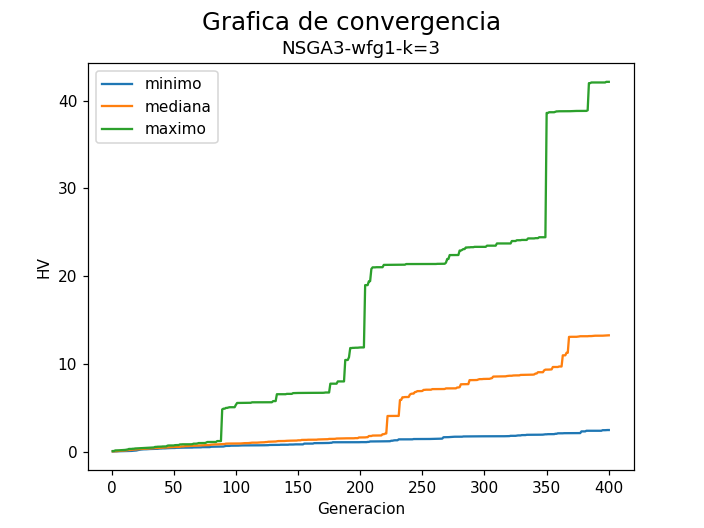

<IPython.core.display.Javascript object>


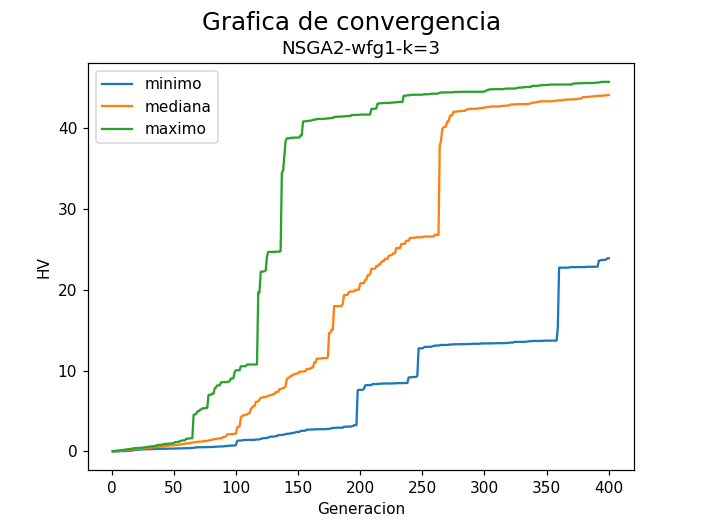

<IPython.core.display.Javascript object>


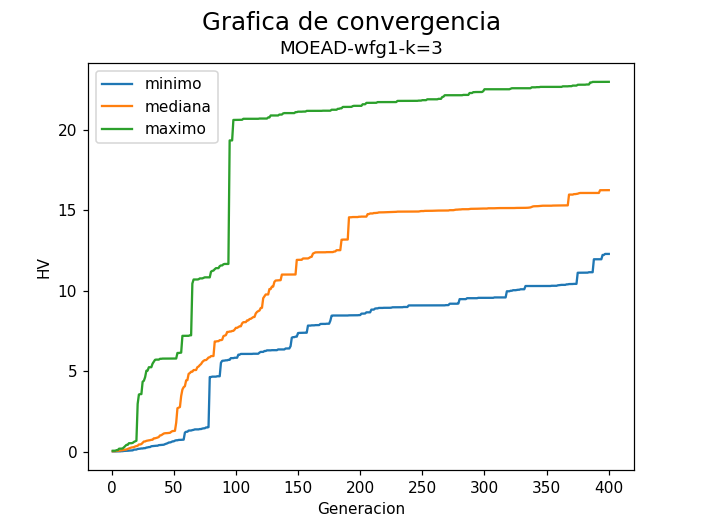

<IPython.core.display.Javascript object>


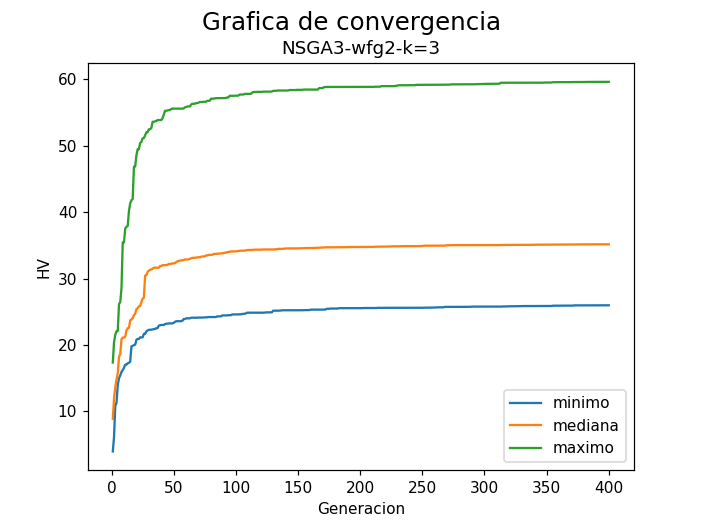

<IPython.core.display.Javascript object>


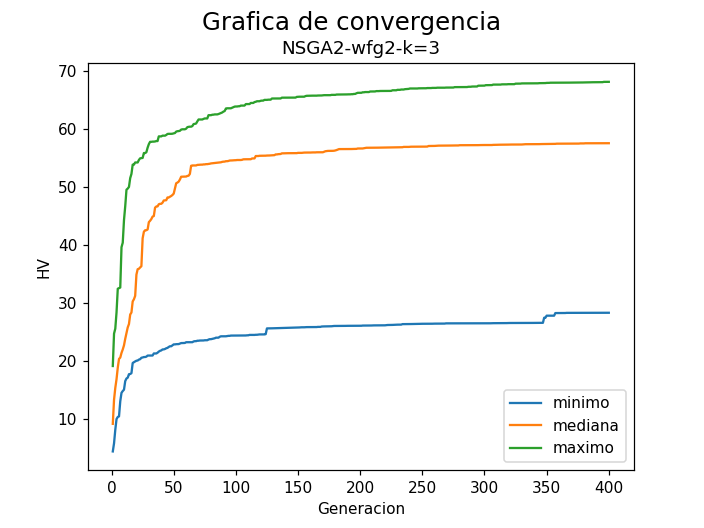

<IPython.core.display.Javascript object>


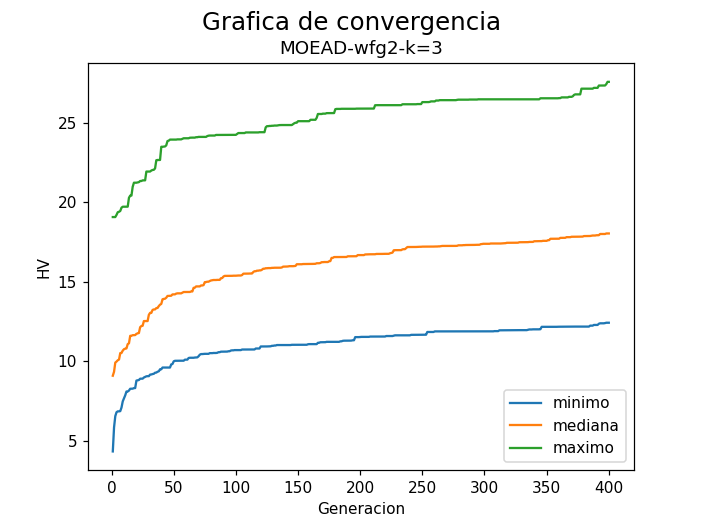

<IPython.core.display.Javascript object>


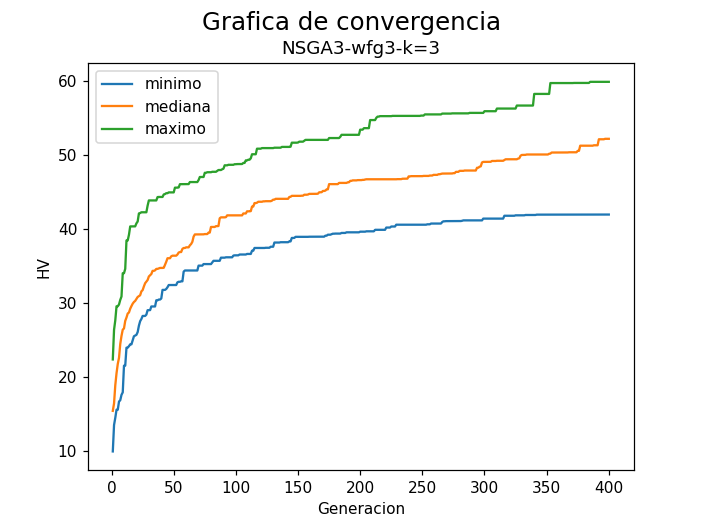

<IPython.core.display.Javascript object>


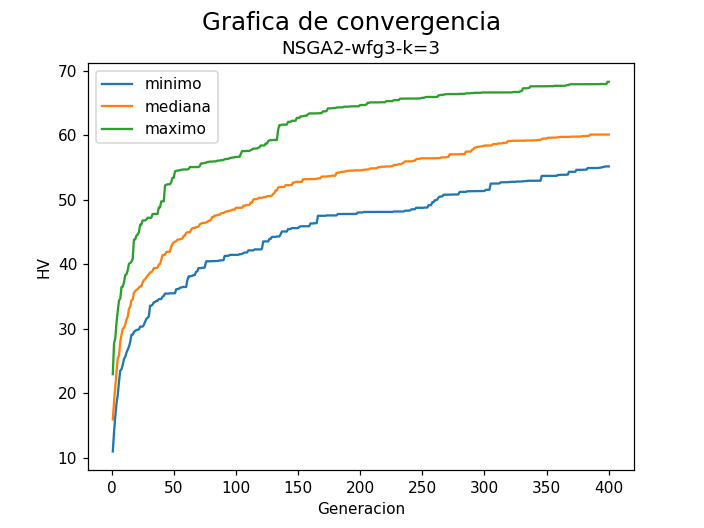

<IPython.core.display.Javascript object>


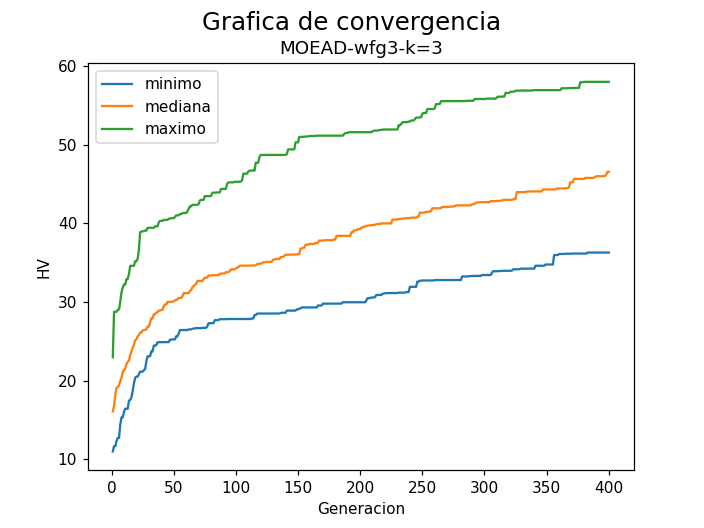

<IPython.core.display.Javascript object>


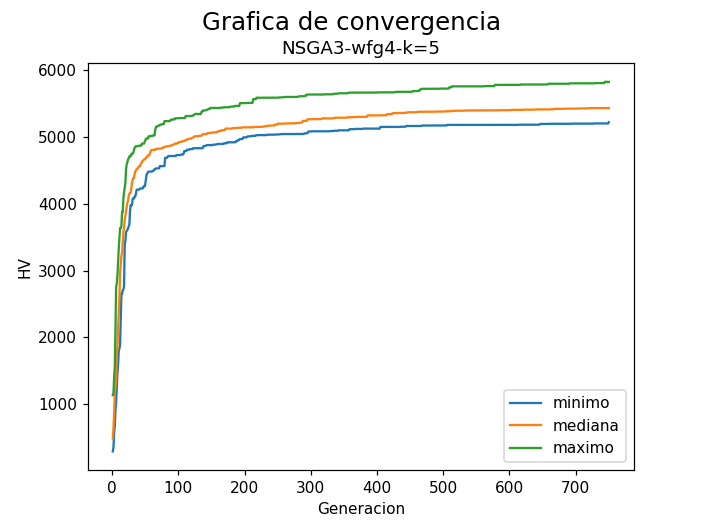

<IPython.core.display.Javascript object>


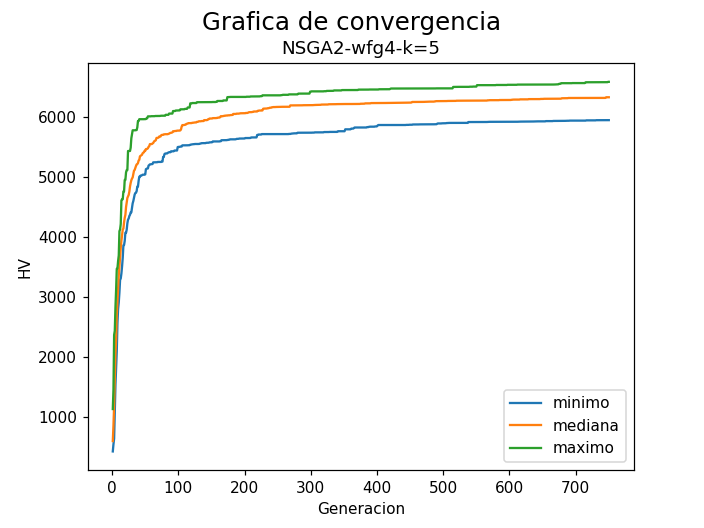

<IPython.core.display.Javascript object>


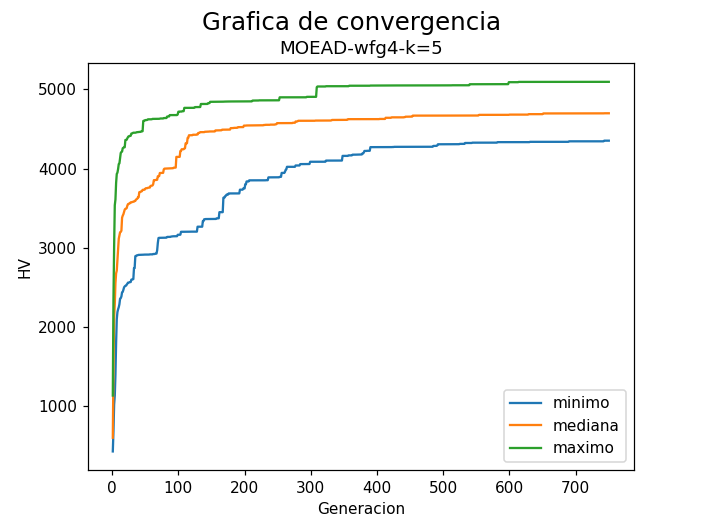

<IPython.core.display.Javascript object>


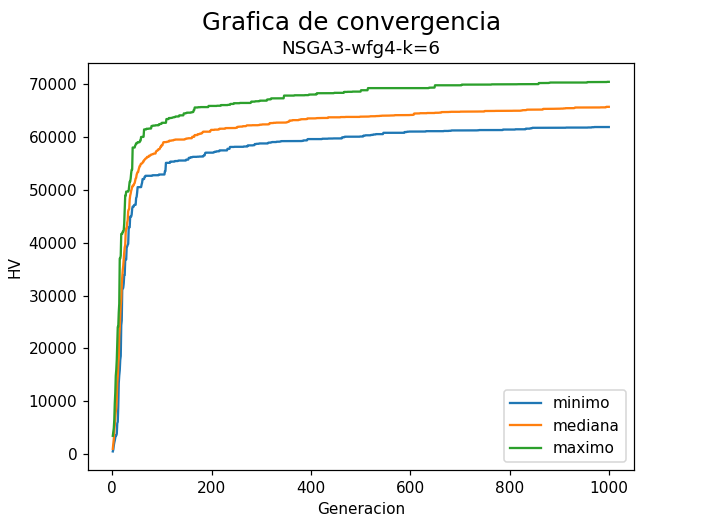

<IPython.core.display.Javascript object>


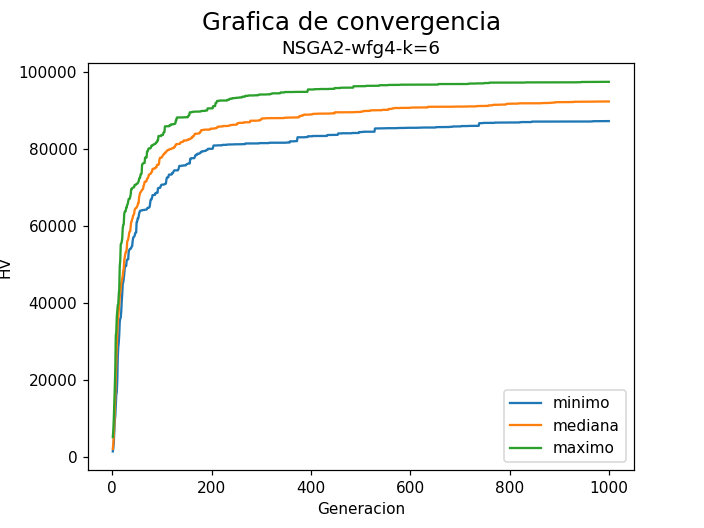

<IPython.core.display.Javascript object>


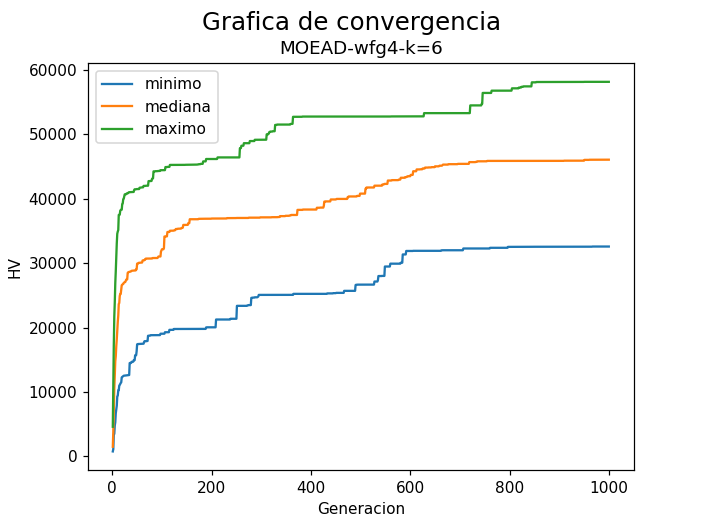

<IPython.core.display.Javascript object>


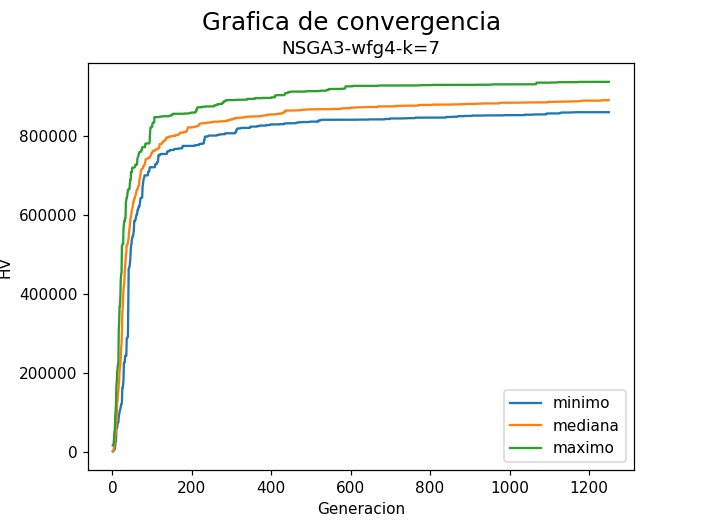

<IPython.core.display.Javascript object>


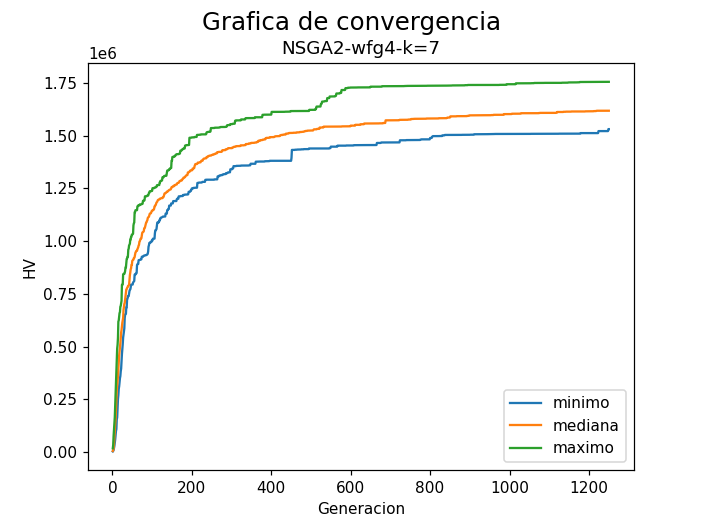

<IPython.core.display.Javascript object>


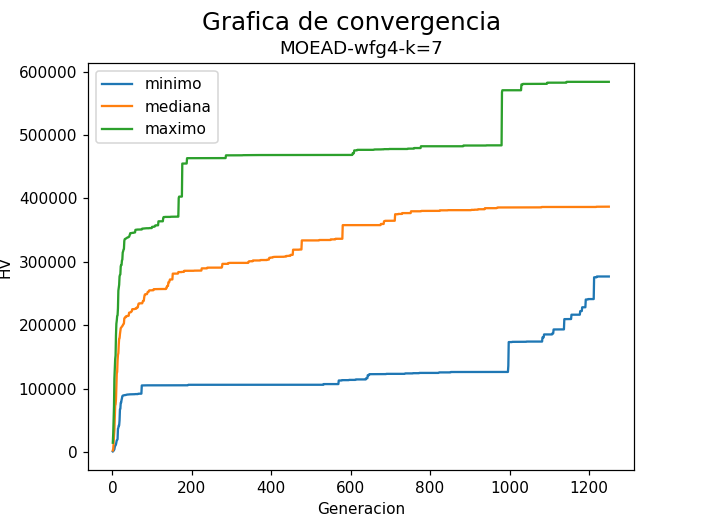

<IPython.core.display.Javascript object>


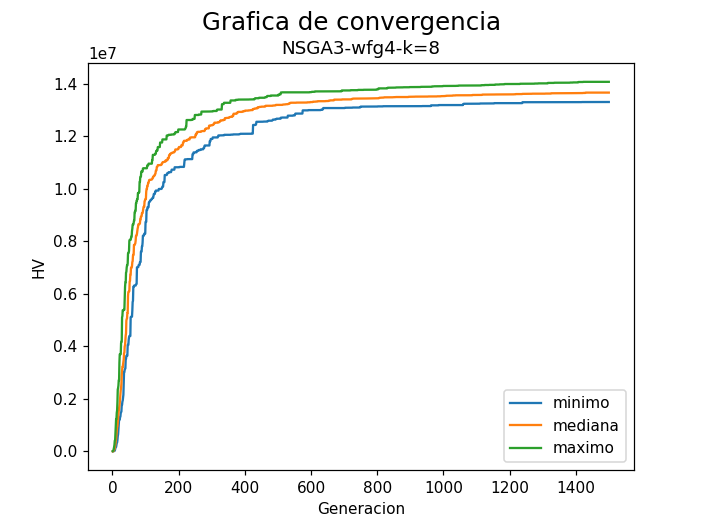

<IPython.core.display.Javascript object>


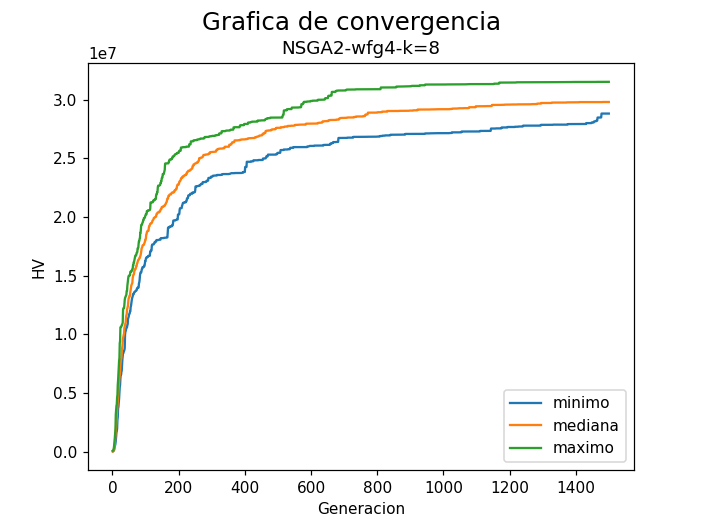

<ipython-input-289-4627f63b35f8>:83: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


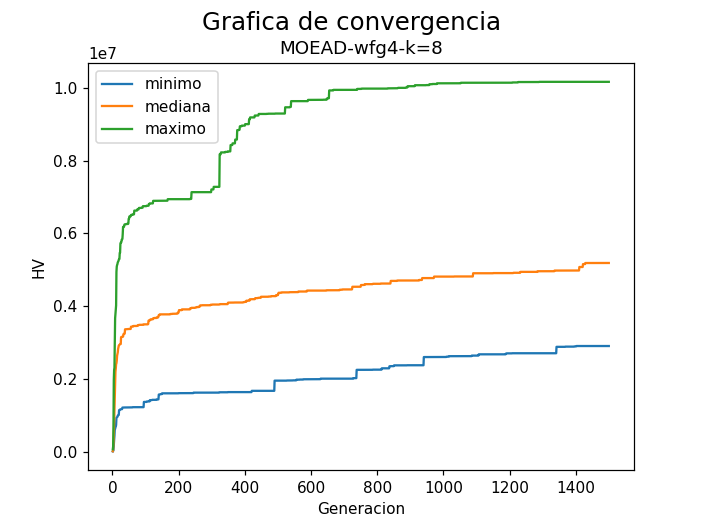

<IPython.core.display.Javascript object>


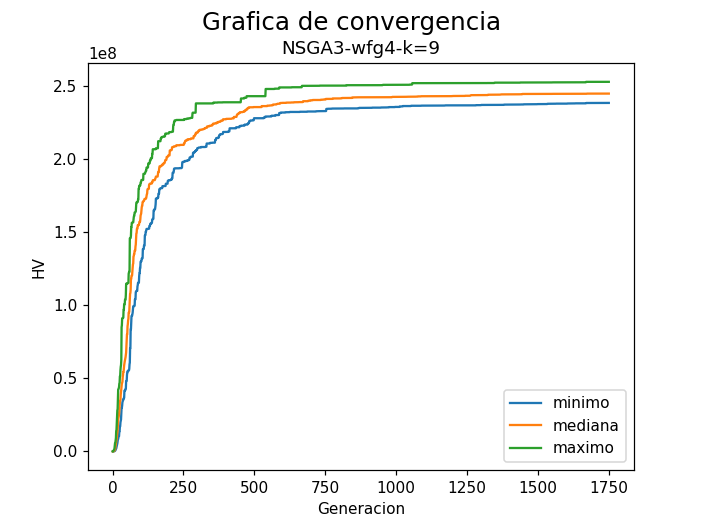

<IPython.core.display.Javascript object>


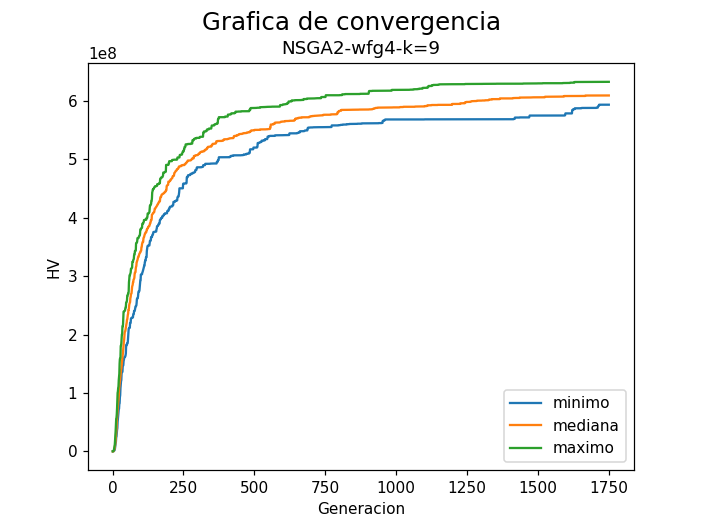

<IPython.core.display.Javascript object>


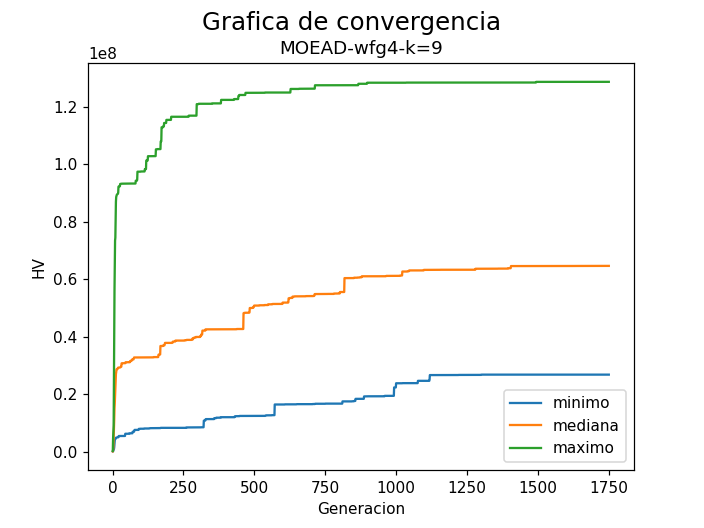

<IPython.core.display.Javascript object>


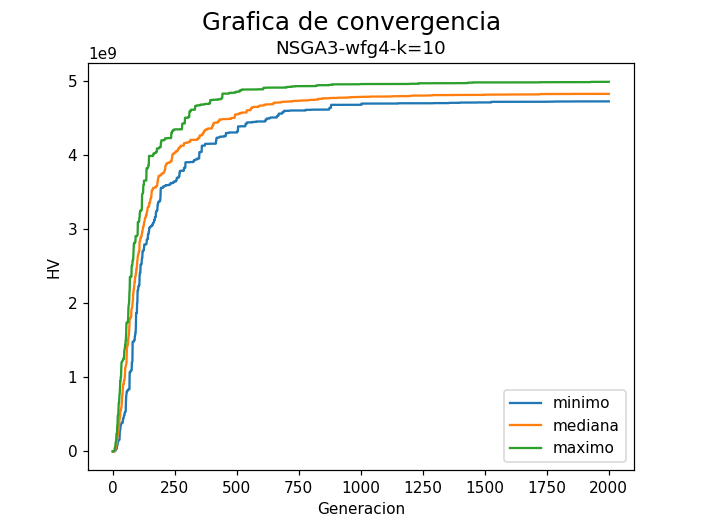

<IPython.core.display.Javascript object>


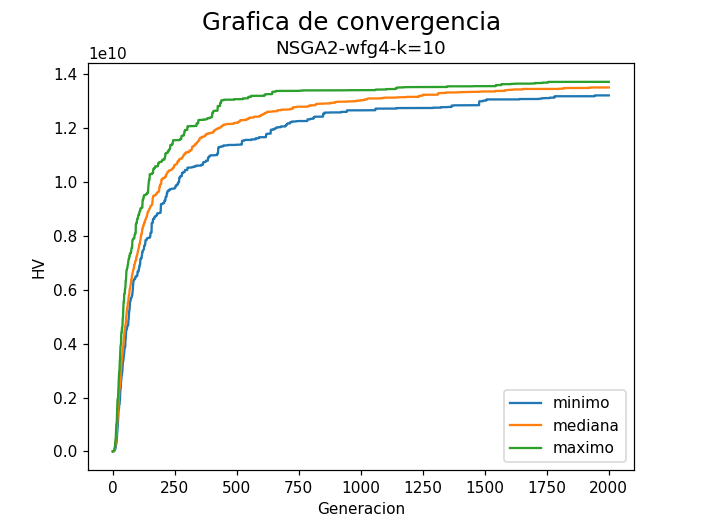

<IPython.core.display.Javascript object>


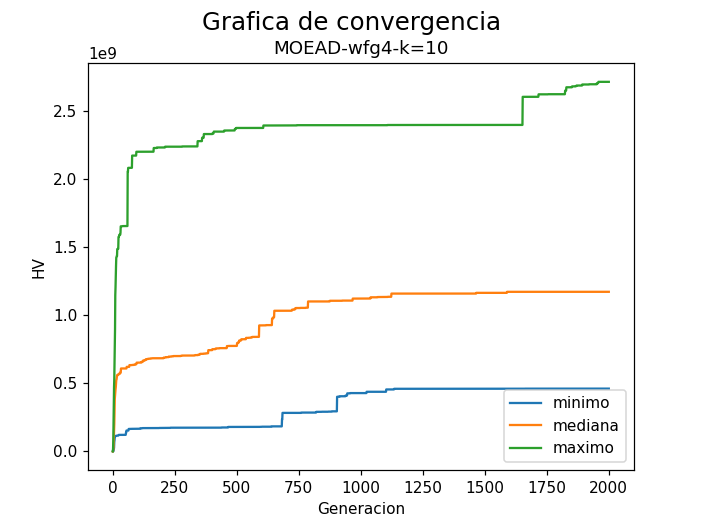

<IPython.core.display.Javascript object>


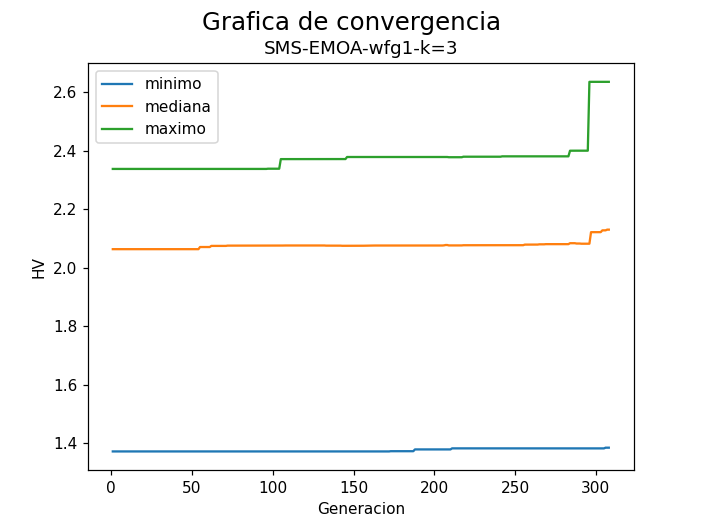

<IPython.core.display.Javascript object>


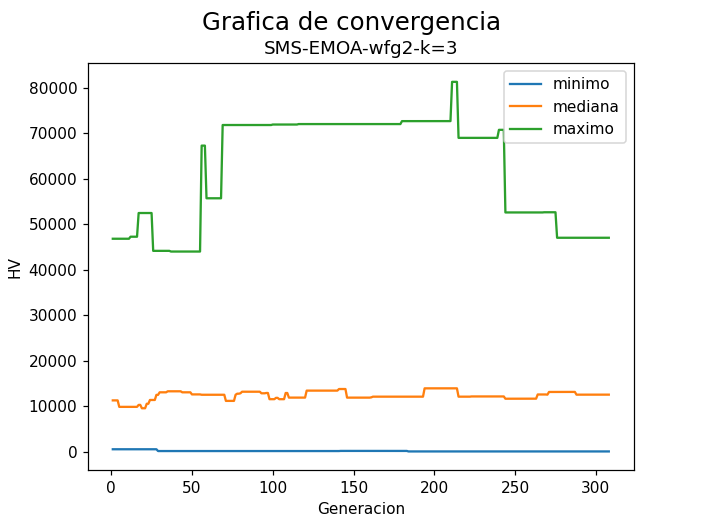

<IPython.core.display.Javascript object>


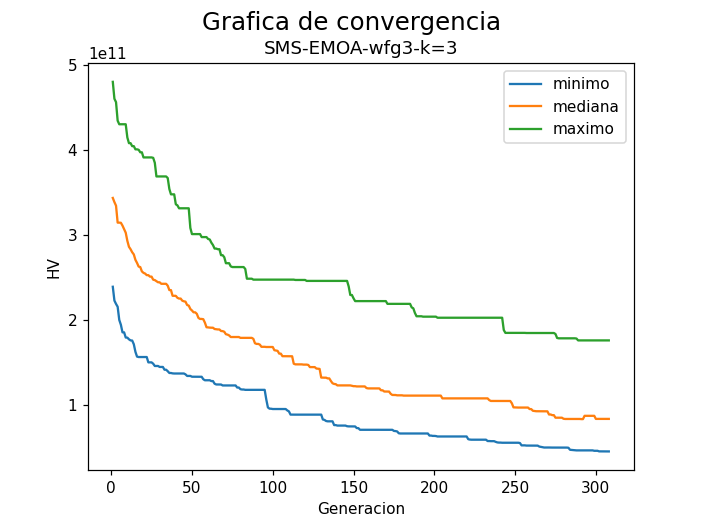

<IPython.core.display.Javascript object>


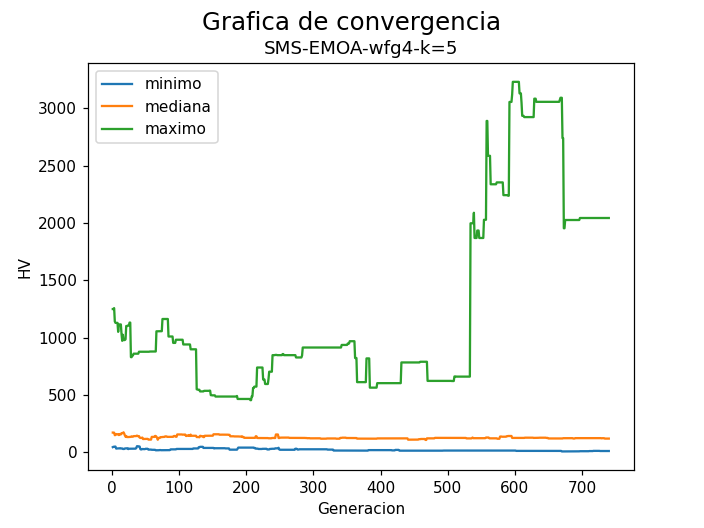

<IPython.core.display.Javascript object>


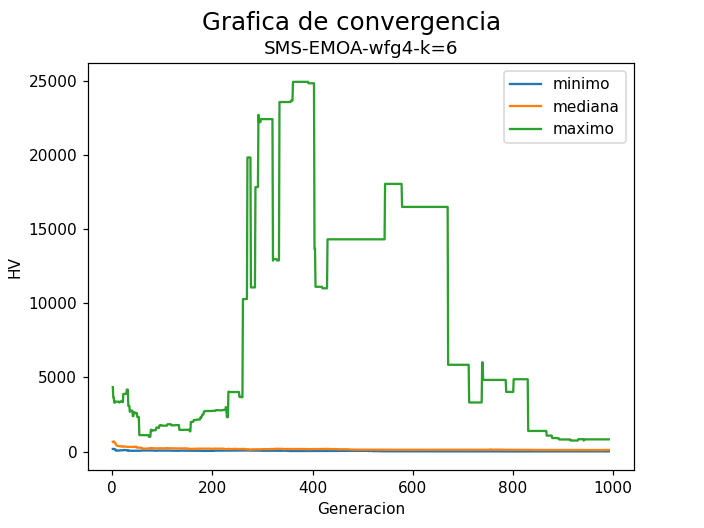

<IPython.core.display.Javascript object>


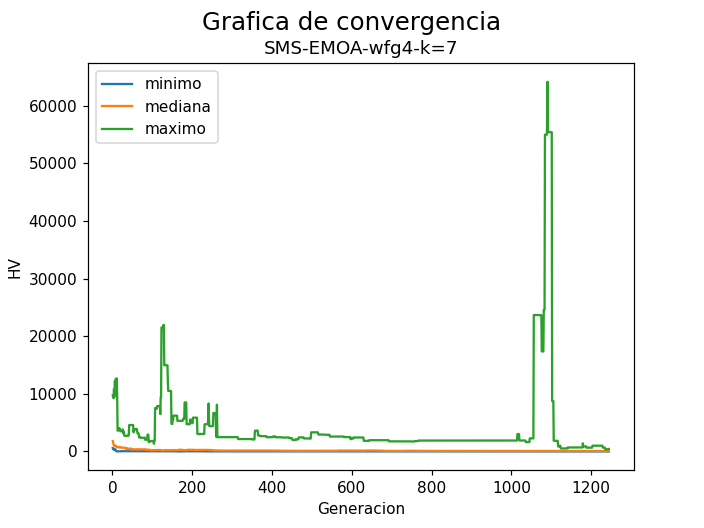

<IPython.core.display.Javascript object>


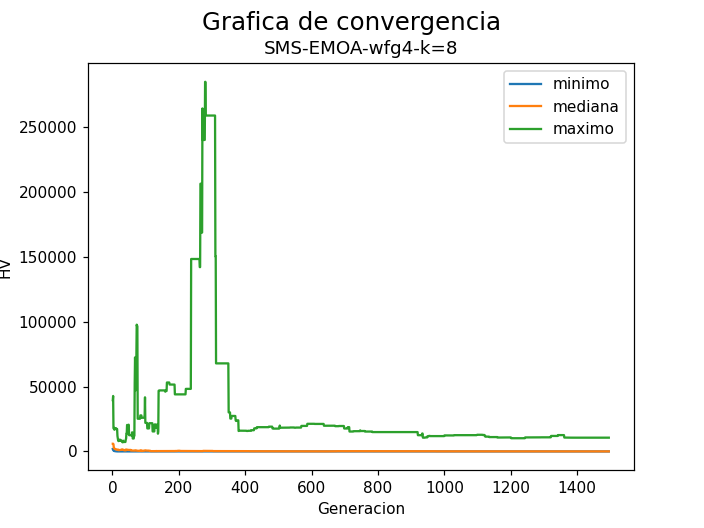

<IPython.core.display.Javascript object>


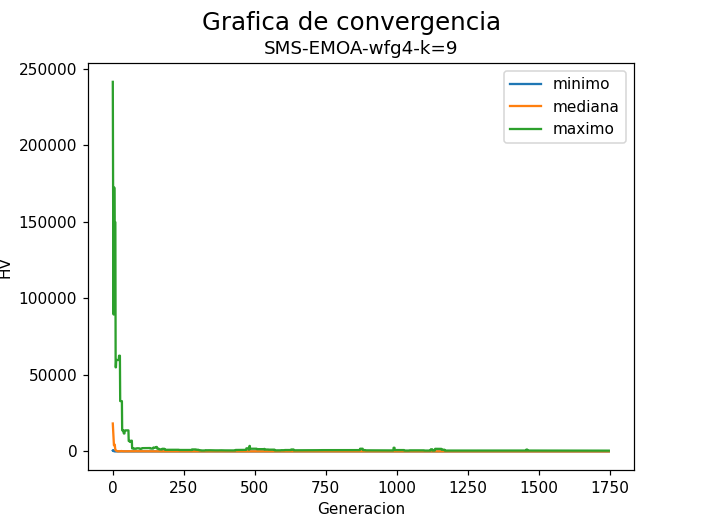

<IPython.core.display.Javascript object>


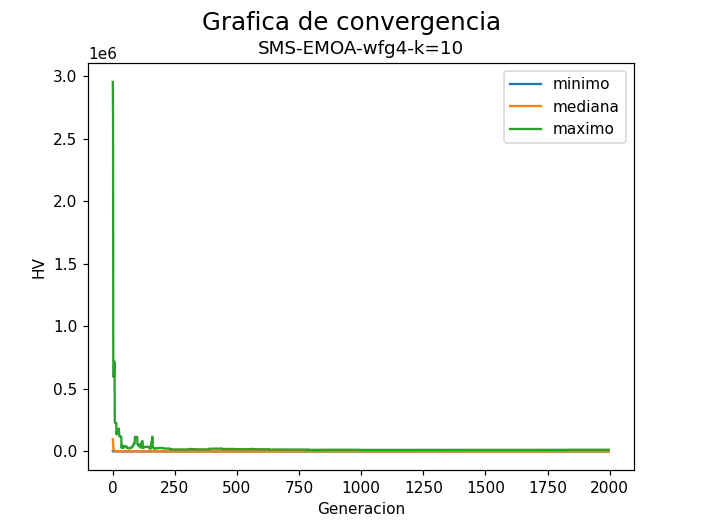

In [294]:
for k in medians.keys():
    multiplot_2d(medians[k], k, "Grafica de convergencia",  "Generacion", "HV", labels = ["minimo", "mediana", "maximo"], save_fig = True)

In [295]:
medians_pareto = {}
for k in merged_data_pareto.keys():
    if "k=3" in k:
        for i in range(len(merged_data_pareto[k])):
            merged_data_pareto[k][i] = np.array(merged_data_pareto[k][i])
        medians_pareto[k] = extract_median_front(np.array(merged_data_pareto[k]), merged_data[k][:,-1])

<ipython-input-295-d03d233040d7>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  medians_pareto[k] = extract_median_front(np.array(merged_data_pareto[k]), merged_data[k][:,-1])


<IPython.core.display.Javascript object>


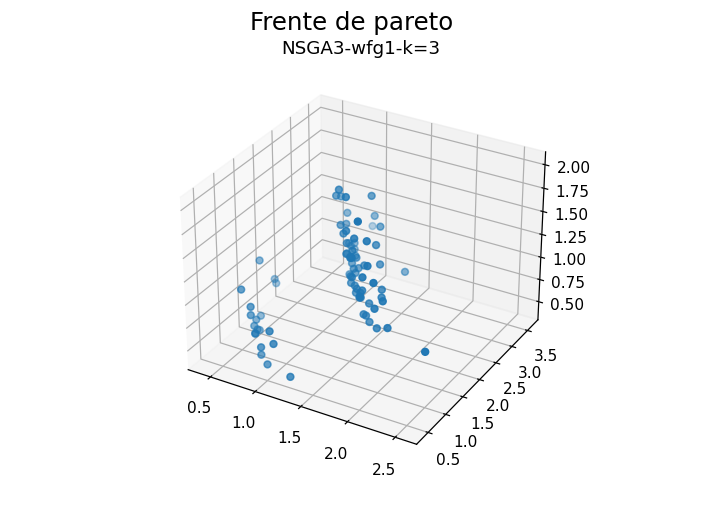

<IPython.core.display.Javascript object>


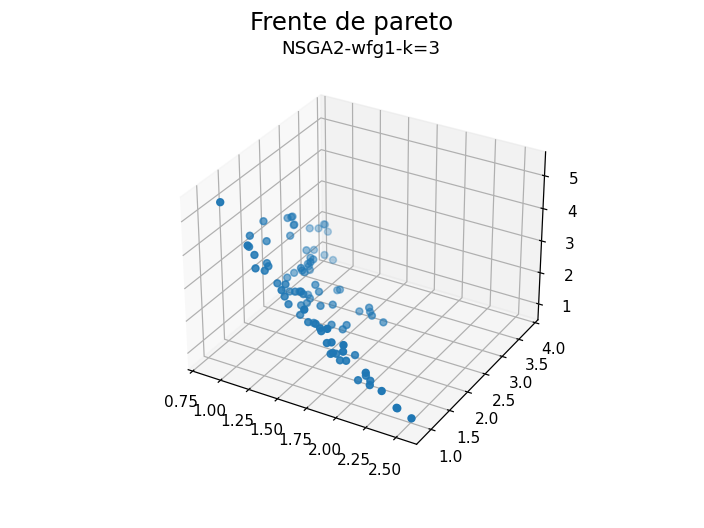

<IPython.core.display.Javascript object>


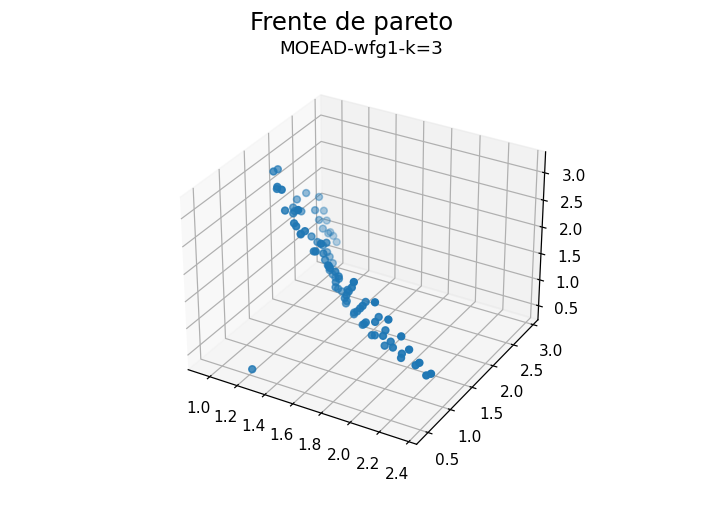

<IPython.core.display.Javascript object>


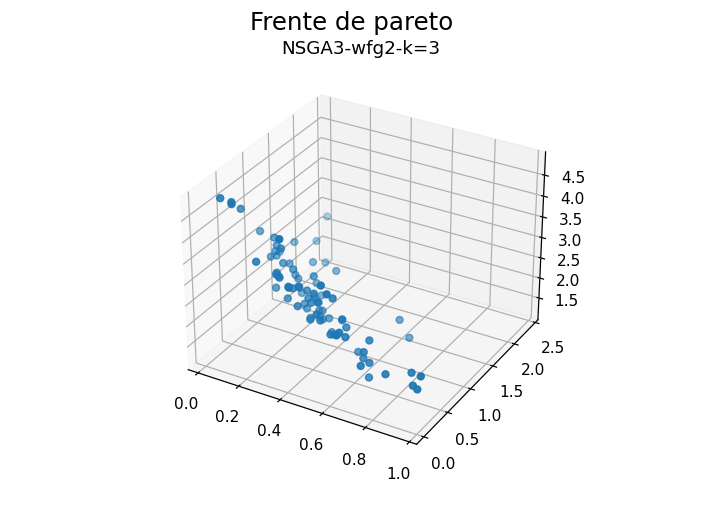

<IPython.core.display.Javascript object>


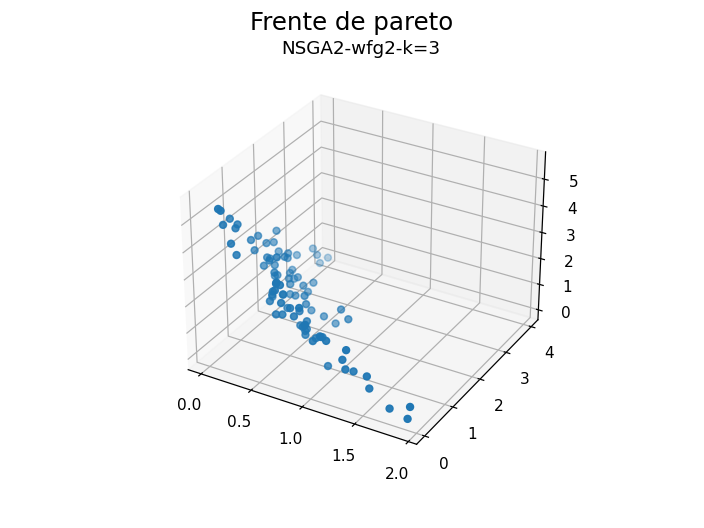

<IPython.core.display.Javascript object>


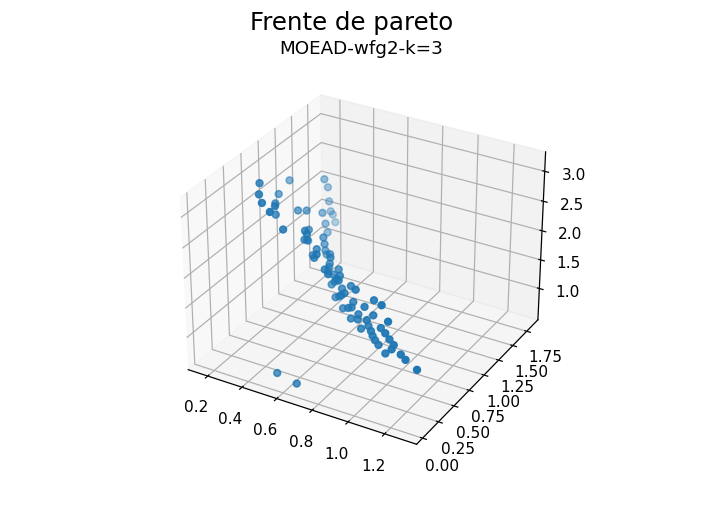

<IPython.core.display.Javascript object>


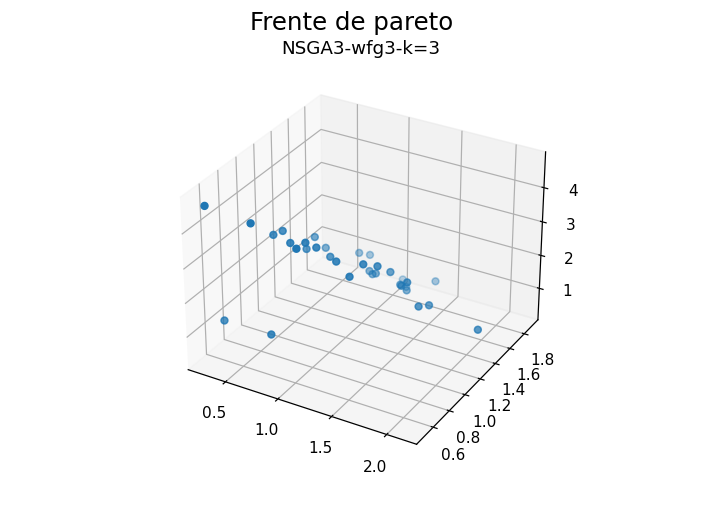

<IPython.core.display.Javascript object>


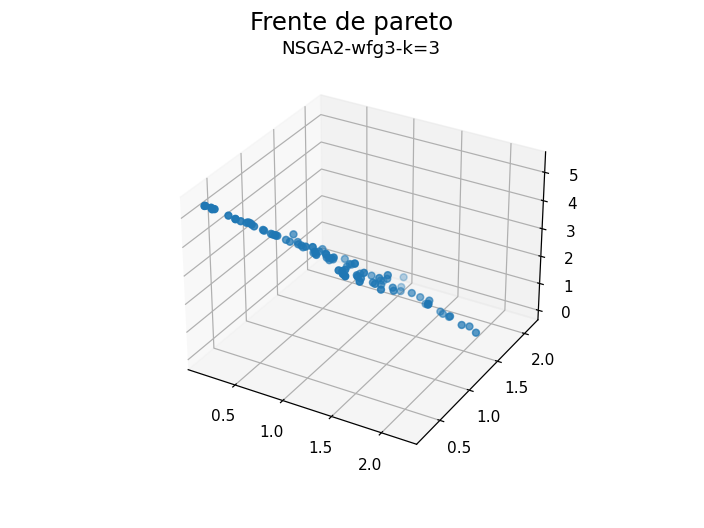

<IPython.core.display.Javascript object>


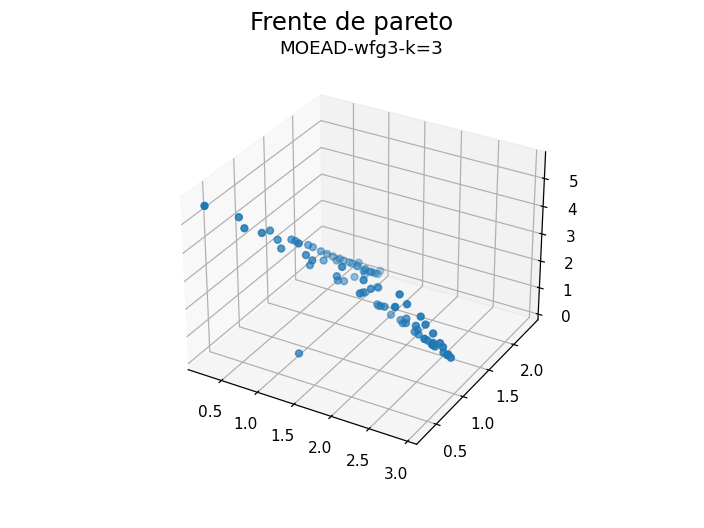

<IPython.core.display.Javascript object>


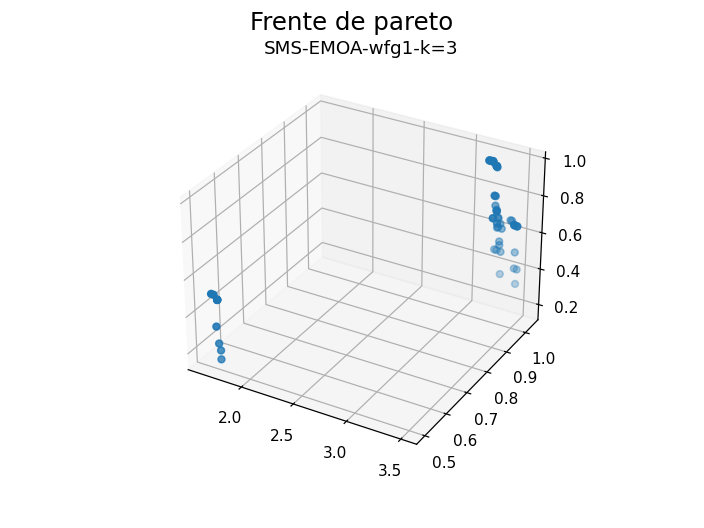

<IPython.core.display.Javascript object>


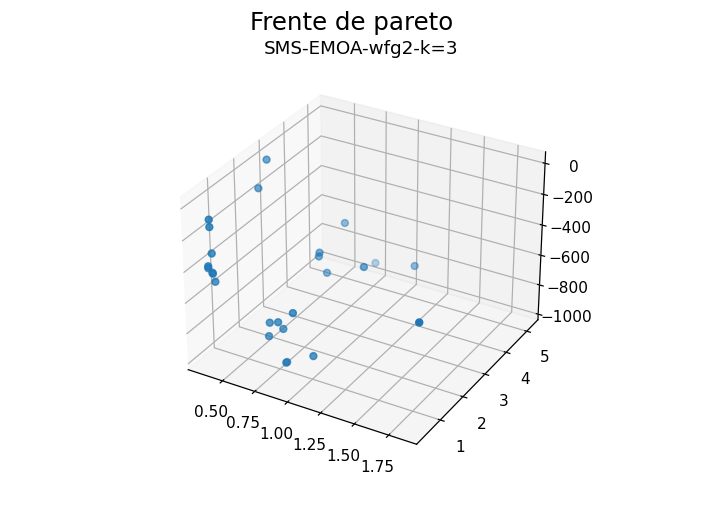

<IPython.core.display.Javascript object>


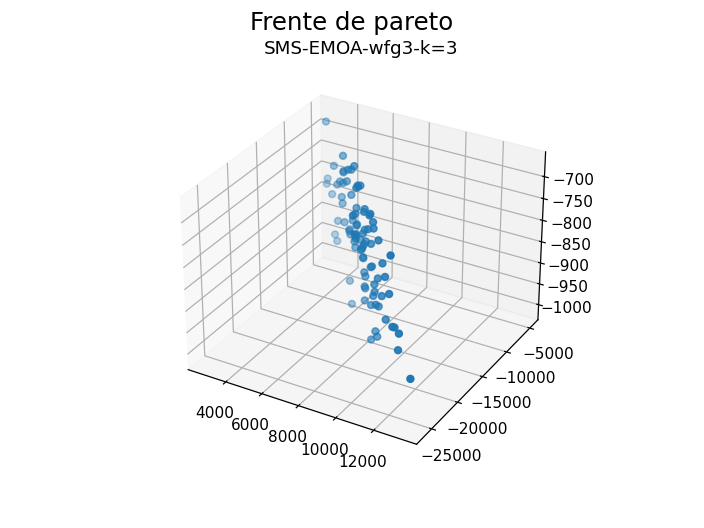

In [296]:
for k, v in medians_pareto.items():
    plot_mat_3d([v], k, f"Frente de pareto", save_fig = True)


In [297]:
scaling = {}
averages = {}
for k in merged_data.keys():
    if "wfg4" in k:
        avg = np.average(merged_data[k], axis = 0)[-1]
        averages[k] = avg

In [298]:
algos = ["NSGA3", "NSGA2", "MOEAD", "SMS-EMOA"]
algo_scaling = dict(zip(algos, [[] for _ in range(len(algos))]))
for algo in algos:
    for i in range(5, 11):
        algo_scaling[algo] += [averages[f"{algo}-wfg4-k={i}"]]

<IPython.core.display.Javascript object>


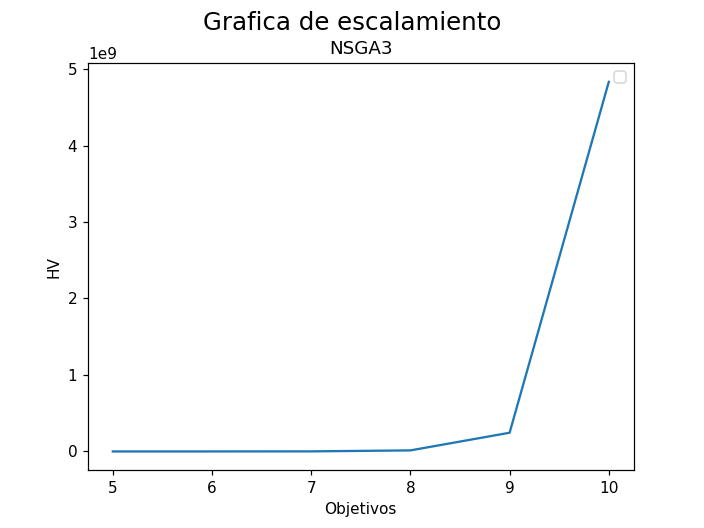

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


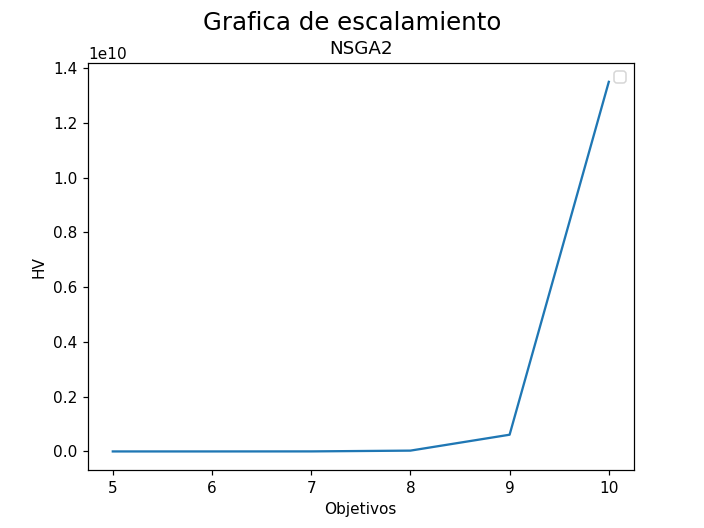

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


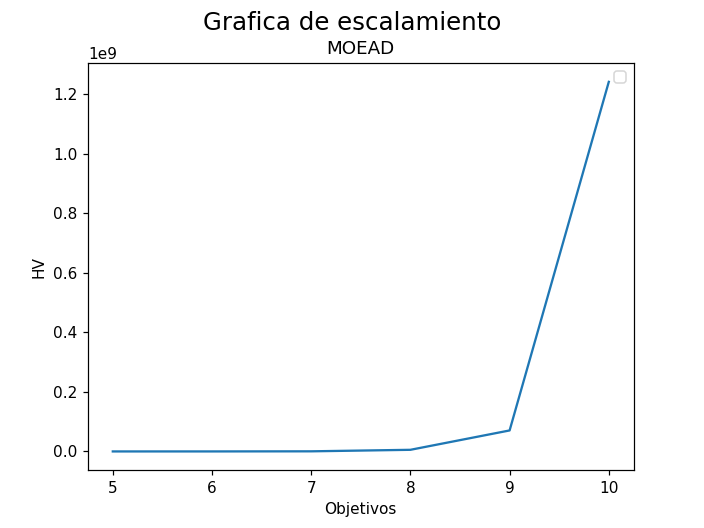

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


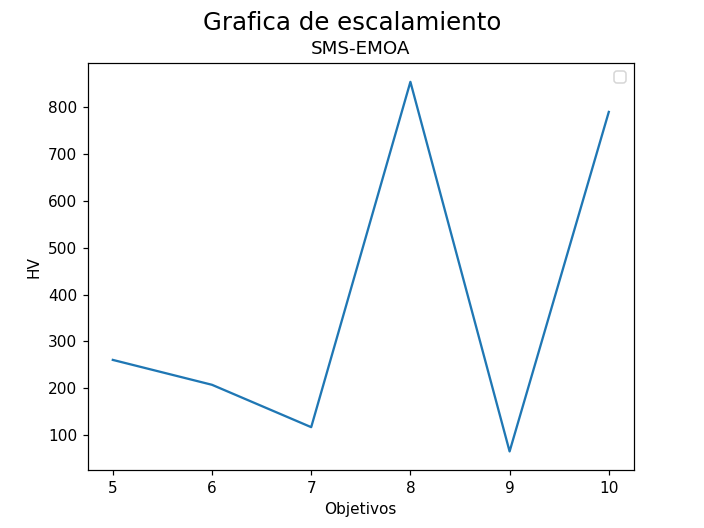

No handles with labels found to put in legend.


In [299]:
x = np.arange(5, 11)
x = x.reshape(6, 1)
for k in algo_scaling.keys():
    pl = np.concatenate((x, np.array(algo_scaling[k]).reshape(6, 1)), axis = 1)
    multiplot_2d([pl], k, "Grafica de escalamiento", "Objetivos", "HV", save_fig = True)

In [300]:
algos = ["NSGA3", "NSGA2", "MOEAD", "SMSEMOA"]
problems = ["wfg1-k=3", "wfg2-k=3", "wfg3-k=3", "wfg4-k=5", "wfg4-k=6", "wfg4-k=7", "wfg4-k=8", "wfg4-k=9", "wfg4-k=10"]
problems_stats = dict(zip(problems, [[] for _ in range(len(problems))]))
algos_stats = dict(zip(algos, [problems_stats.copy() for _ in range(len(algos))]))
algos_stats_table = dict(zip(algos, [problems_stats.copy() for _ in range(len(algos))]))
for k in merged_data.keys():
    avg_table = np.average(merged_data[k][:,-1])
    std_table = np.std(merged_data[k][:,-1])
    avg = np.average(merged_data[k], axis = 1)
    std_dev = np.std(merged_data[k], axis = 1)
    key = k
    if "SMS-EMOA" in key:
        key = key.replace("SMS-EMOA","SMSEMOA")
    splitted_k = key.split("-")
    algo = splitted_k[0]
    problem = splitted_k[1] + "-" + splitted_k[2]
    algos_stats_table[algo][problem] = [avg_table, std_table]
    algos_stats[algo][problem] = [list(avg), list(std_dev)]

In [301]:
problems_stats = dict(zip(problems, [[] for _ in range(len(problems))]))
transformed_data = dict(zip(algos, [problems_stats.copy() for _ in range(len(algos))]))
for k in merged_data.keys():
    key = k
    if "SMS-EMOA" in key:
        key = key.replace("SMS-EMOA","SMSEMOA")
    splitted_k = key.split("-")
    algo = splitted_k[0]
    problem = splitted_k[1] + "-" + splitted_k[2]
    transformed_data[algo][problem] = merged_data[k]

In [302]:
from scipy.stats import ranksums
import random
p_tests = {}
keys = list(transformed_data.keys())
for i in range(len(keys)):
    k1 = keys[i]
    for j in range(i + 1, len(keys)):
        k2 = keys[j]
        algo_pair = k1 + "-" + k2
        p_tests[algo_pair] = {}
        for prob in problems:
            min_cols = min(transformed_data[k1][prob].shape[1], transformed_data[k2][prob].shape[1])
            runs = transformed_data[k1][prob].shape[0]
            p_tests[algo_pair][prob] = []
            for run in range(runs):
                p_tests[algo_pair][prob] += [ranksums(transformed_data[k1][prob][run,:min_cols], transformed_data[k2][prob][run, :min_cols]).pvalue]
        


In [303]:
problem_algo_mapping = {}
for algo in transformed_data.keys():
    for problem in algos_stats[algo].keys():
        if problem not in problem_algo_mapping:
            problem_algo_mapping[problem] = {}
            problem_algo_mapping[problem][algo] = transformed_data[algo][problem][:,-1]
        else:
            problem_algo_mapping[problem][algo] = transformed_data[algo][problem][:,-1]

<IPython.core.display.Javascript object>


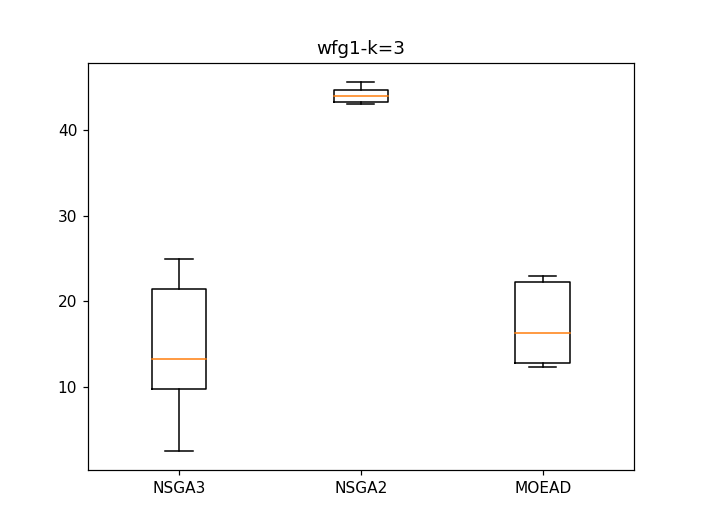

<IPython.core.display.Javascript object>


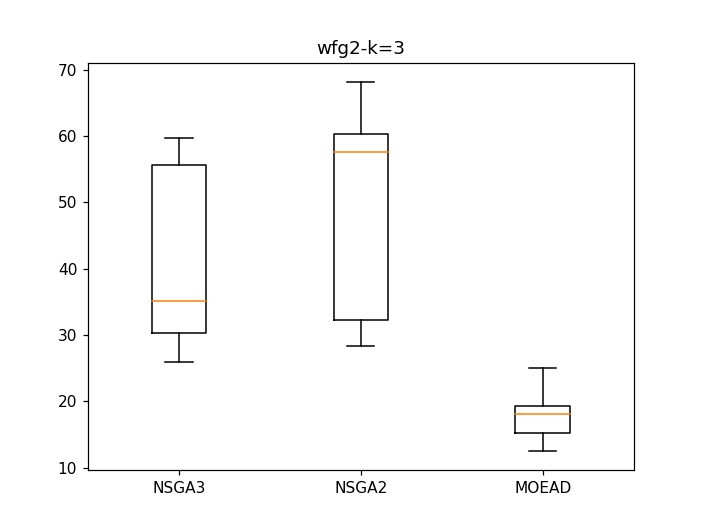

<IPython.core.display.Javascript object>


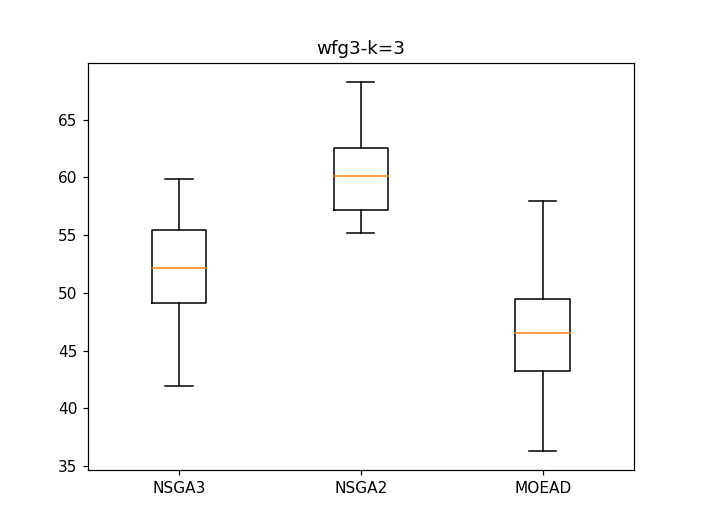

<IPython.core.display.Javascript object>


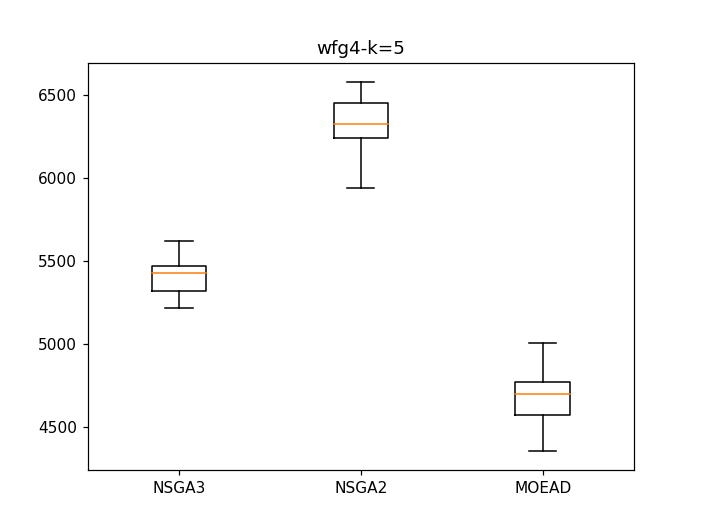

<IPython.core.display.Javascript object>


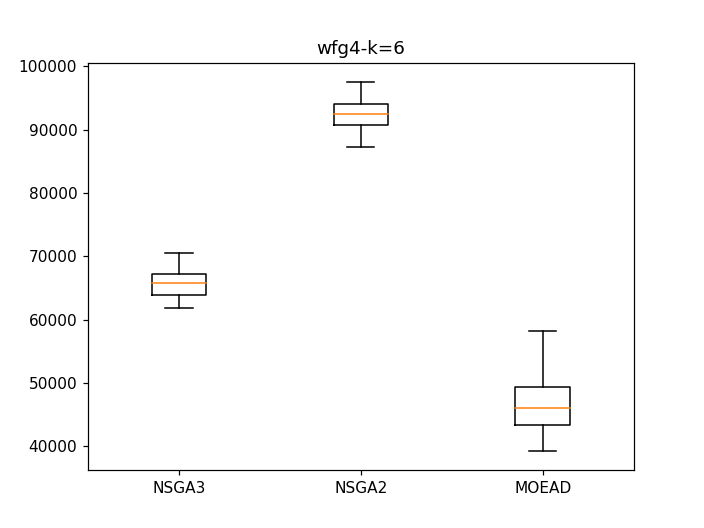

<IPython.core.display.Javascript object>


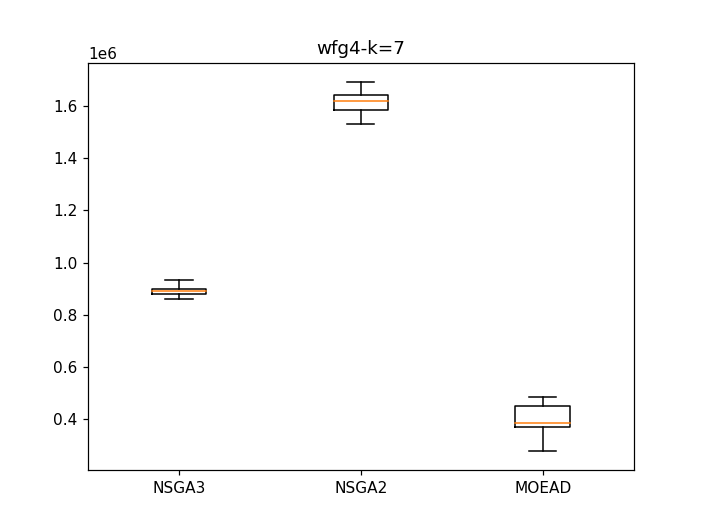

<IPython.core.display.Javascript object>


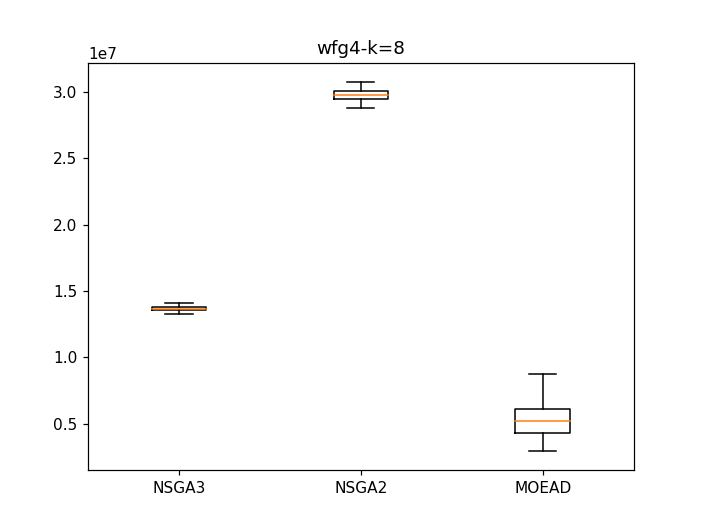

<IPython.core.display.Javascript object>


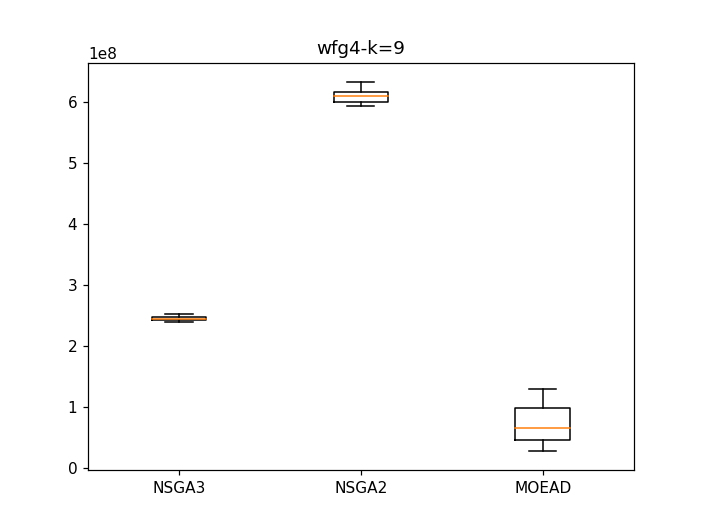

<IPython.core.display.Javascript object>


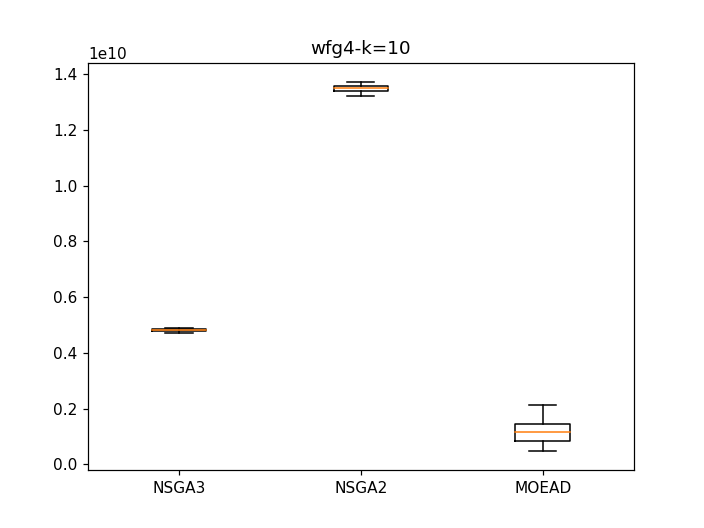

In [304]:
for problem in problem_algo_mapping.keys():
    data = list(problem_algo_mapping[problem].values())[:-1]
    labels = list(problem_algo_mapping[problem].keys())[:-1]
    fig, ax = plt.subplots()
    ax.set_title(problem)
    ax.boxplot(data, labels = labels, showfliers=False)
    plt.savefig(f"{problem}-box-plot.png")
    plt.show()

In [305]:
algos_stats

{'NSGA3': {'wfg1-k=3': [[1.7768620877845702,
    4.730843726022741,
    4.242099135093469,
    4.649545295056483,
    3.289026249629643,
    8.132584297423321,
    5.1953189409791785,
    12.42059879937793,
    7.066637313024595,
    8.183288847808425,
    2.898620306143477,
    1.1906921665399806,
    1.8333418762056897,
    1.723134734885161,
    10.239329575695859,
    11.220139487177867,
    6.483434061462771,
    2.0918659045269727,
    5.309684538692709,
    6.119837632026099],
   [1.8036364441923707,
    3.292865239402906,
    3.6698644042648176,
    4.794149449968663,
    3.5961704030985735,
    7.799698150572547,
    5.492458680324797,
    10.498147347790036,
    8.42231403534372,
    4.819546896858419,
    3.118438850364211,
    0.6510080876006195,
    1.6522409817797354,
    0.9656913690734762,
    10.065393169819393,
    12.709148123925827,
    4.996396470353553,
    2.272501421167545,
    4.4166010942302965,
    7.445608494284247]],
  'wfg2-k=3': [[45.22344148465746,
    2

In [306]:
p_tests

{'NSGA3-NSGA2': {'wfg1-k=3': [1.454833049247013e-53,
   1.5776792389194862e-37,
   1.8832966288761378e-25,
   3.30840689837816e-38,
   7.547703750081983e-33,
   5.445971197882758e-13,
   9.354688118829907e-28,
   4.994903493554439e-34,
   3.974562690902648e-27,
   9.625655409332816e-34,
   5.36107501313876e-55,
   1.3262848434905976e-75,
   2.6775928192447653e-31,
   7.918692122163809e-56,
   3.862721324178343e-18,
   4.5176731730534976e-27,
   5.7508463722552574e-46,
   8.932808555649913e-59,
   2.9768656998941597e-10,
   4.171920341582026e-45],
  'wfg2-k=3': [3.590368182251542e-95,
   5.006525702826968e-120,
   1.8428499047949433e-21,
   1.8190044667988444e-88,
   1.9594987557743984e-13,
   1.248926133389538e-102,
   3.1920428276726146e-38,
   3.557875319486857e-111,
   1.762640583385751e-123,
   2.3188944129729054e-118,
   1.0787747397118674e-121,
   2.3864281623918714e-122,
   1.4751944573337745e-18,
   6.408451028963275e-126,
   1.1999142760691065e-119,
   1.3262848434905976e-75,


In [307]:
for algo in algos_stats.keys():
    columns = list(algos_stats[algo].keys())
    values = list(algos_stats[algo].values())
    r = len(values[0][0])
    rows = []
    for column in columns:
        row = []
        for i in range(r):
            row += [f"{round(algos_stats[algo][column][0][i], 2)} ({round(algos_stats[algo][column][1][i],2)})"]
        rows.append(row)
    rows = np.array(rows).T
    df = pd.DataFrame(rows, columns = columns)
    print(df.to_latex(caption = f"Estadisticos para {algo}"))

\begin{table}
\centering
\caption{Estadisticos para NSGA3}
\begin{tabular}{llllllllll}
\toprule
{} &       wfg1-k=3 &      wfg2-k=3 &      wfg3-k=3 &          wfg4-k=5 &            wfg4-k=6 &               wfg4-k=7 &                  wfg4-k=8 &                    wfg4-k=9 &                     wfg4-k=10 \\
\midrule
0  &     1.78 (1.8) &  45.22 (8.05) &   50.27 (5.4) &  5065.67 (432.59) &  63965.61 (8032.22) &  857038.15 (112496.57) &  12680386.28 (2116981.99) &  228410745.09 (39746398.08) &   4500519776.9 (842655235.42) \\
1  &    4.73 (3.29) &  27.08 (2.59) &  39.99 (5.74) &  5274.89 (538.55) &   58713.4 (6870.07) &  830516.86 (124165.69) &  12631938.25 (2213309.88) &  226101262.19 (41785909.62) &  4440918355.43 (885482260.91) \\
2  &    4.24 (3.67) &  26.55 (2.19) &  49.49 (7.78) &  5025.62 (555.35) &  61575.39 (7844.55) &   806473.6 (129074.19) &  12514162.42 (2340147.99) &  228780565.91 (41085714.14) &  4528211837.95 (884228322.01) \\
3  &    4.65 (4.79) &  50.48 (7.59) &   41.31 (

In [308]:
for algo in p_tests.keys():
    columns = list(p_tests[algo].keys())
    values = list(p_tests[algo].values())
    values = np.array(values)
    df = pd.DataFrame(values.T, columns = columns)
    print(df.to_latex(caption = f"Wilkoxon Rank-Sum para {algo}"))

\begin{table}
\centering
\caption{Wilkoxon Rank-Sum para NSGA3-NSGA2}
\begin{tabular}{lrrrrrrrrr}
\toprule
{} &      wfg1-k=3 &       wfg2-k=3 &       wfg3-k=3 &       wfg4-k=5 &       wfg4-k=6 &  wfg4-k=7 &  wfg4-k=8 &  wfg4-k=9 &  wfg4-k=10 \\
\midrule
0  &  1.454833e-53 &   3.590368e-95 &   8.540339e-78 &  1.605830e-181 &  7.978827e-269 &       0.0 &       0.0 &       0.0 &        0.0 \\
1  &  1.577679e-37 &  5.006526e-120 &   4.623533e-81 &  7.205781e-194 &  6.759461e-285 &       0.0 &       0.0 &       0.0 &        0.0 \\
2  &  1.883297e-25 &   1.842850e-21 &   1.115126e-02 &  1.029393e-208 &  8.948819e-290 &       0.0 &       0.0 &       0.0 &        0.0 \\
3  &  3.308407e-38 &   1.819004e-88 &   1.314359e-76 &  4.171493e-190 &  2.046913e-293 &       0.0 &       0.0 &       0.0 &        0.0 \\
4  &  7.547704e-33 &   1.959499e-13 &   7.981055e-06 &  1.102223e-205 &  3.742988e-286 &       0.0 &       0.0 &       0.0 &        0.0 \\
5  &  5.445971e-13 &  1.248926e-102 &   2.324541e-

In [309]:
algos_stats_avg = {}
for algo in algos_stats.keys():
    algos_stats_avg[algo] = {}
    for problem in algos_stats[algo].keys():
        algos_stats_avg[algo][problem] = algos_stats[algo][problem][0]

In [310]:
algos_stats_avg

{'NSGA3': {'wfg1-k=3': [1.7768620877845702,
   4.730843726022741,
   4.242099135093469,
   4.649545295056483,
   3.289026249629643,
   8.132584297423321,
   5.1953189409791785,
   12.42059879937793,
   7.066637313024595,
   8.183288847808425,
   2.898620306143477,
   1.1906921665399806,
   1.8333418762056897,
   1.723134734885161,
   10.239329575695859,
   11.220139487177867,
   6.483434061462771,
   2.0918659045269727,
   5.309684538692709,
   6.119837632026099],
  'wfg2-k=3': [45.22344148465746,
   27.075957231292023,
   26.54642453672471,
   50.48008566747471,
   50.52993936480856,
   53.43306357947408,
   28.420889102390802,
   50.48556676880877,
   56.835101913559456,
   30.919152486569303,
   36.823337097774974,
   52.859940325713666,
   27.197140868250916,
   24.774114845311907,
   29.03222469156216,
   30.545629363267917,
   29.09940369401263,
   50.96205162217568,
   51.983731840376784,
   30.182537852180374],
  'wfg3-k=3': [50.27316603682444,
   39.98626686752159,
   49.48725

In [311]:
scores_table = {}
scores = {}
keys = list(transformed_data.keys())
scores = dict(zip(keys, [{} for _ in keys]))
for i in range(len(keys)):
    k1 = keys[i]
    for j in range(i + 1, len(keys)):
        k2 = keys[j]
        algo_pair = k1 + "-" + k2
        scores_table[algo_pair] = {}
        for prob in problems:
            min_cols = min(transformed_data[k1][prob].shape[1], transformed_data[k2][prob].shape[1])
            runs = transformed_data[k1][prob].shape[0]
            a = np.array(algos_stats_avg[k1][prob])
            b = np.array(algos_stats_avg[k2][prob])
            c = np.zeros(shape = a.shape)
            c[a > b] = 1
            c[a < b] = -1
            d = np.array(p_tests[algo_pair][prob])
            c[d > 0.05] = 0 
            if prob not in scores[k1]:
                scores[k1][prob] = c.copy()
            else:
                scores[k1][prob] += c.copy()
            if prob not in scores[k2]:
                scores[k2][prob] = -c.copy()
            else:
                scores[k2][prob] -= c.copy()
            scores_table[algo_pair][prob] = list(c)

In [312]:
scores

{'NSGA3': {'wfg1-k=3': array([-3., -2., -1., -1., -1., -1., -1.,  0., -1., -1., -1., -3., -3.,
         -3., -2., -1., -1., -1., -1., -1.]),
  'wfg2-k=3': array([-1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,
         -1., -1.,  1.,  1., -1.,  1., -1.]),
  'wfg3-k=3': array([-1., -2.,  1., -1., -1., -1., -2., -1., -1., -3., -1., -1., -1.,
         -1., -3., -1., -1., -1., -1., -1.]),
  'wfg4-k=5': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1.]),
  'wfg4-k=6': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1.]),
  'wfg4-k=7': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1.]),
  'wfg4-k=8': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1.]),
  'wfg4-k=9': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1.]),
  'wfg4-k=10': array([1., 1., 1., 1

In [313]:
scores_table

{'NSGA3-NSGA2': {'wfg1-k=3': [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  'wfg2-k=3': [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   1.0,
   -1.0,
   1.0,
   -1.0,
   -1.0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   1.0,
   1.0,
   -1.0,
   1.0,
   -1.0],
  'wfg3-k=3': [-1.0,
   -1.0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  'wfg4-k=5': [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  'wfg4-k=6': [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  'wfg4-k=7': [-1.0,
   -1.

In [314]:
for algo in scores_table.keys():
    columns = list(scores_table[algo].keys())
    values = list(scores_table[algo].values())
    values = np.array(values)
    df = pd.DataFrame(values.T, columns = columns)
    print(df.to_latex(caption = f"Scoring de {algo}"))

\begin{table}
\centering
\caption{Scoring de NSGA3-NSGA2}
\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  wfg1-k=3 &  wfg2-k=3 &  wfg3-k=3 &  wfg4-k=5 &  wfg4-k=6 &  wfg4-k=7 &  wfg4-k=8 &  wfg4-k=9 &  wfg4-k=10 \\
\midrule
0  &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &       -1.0 \\
1  &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &       -1.0 \\
2  &      -1.0 &      -1.0 &       1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &       -1.0 \\
3  &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &       -1.0 \\
4  &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &       -1.0 \\
5  &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &       -1.0 \\
6  &      -1.0 &       1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &   

In [315]:
for algo in scores.keys():
    columns = list(scores[algo].keys())
    values = list(scores[algo].values())
    values = np.array(values)
    df = pd.DataFrame(values.T, columns = columns)
    print(df.to_latex(caption = f"Scores de {algo} por problema"))

\begin{table}
\centering
\caption{Scores de NSGA3 por problema}
\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  wfg1-k=3 &  wfg2-k=3 &  wfg3-k=3 &  wfg4-k=5 &  wfg4-k=6 &  wfg4-k=7 &  wfg4-k=8 &  wfg4-k=9 &  wfg4-k=10 \\
\midrule
0  &      -3.0 &      -1.0 &      -1.0 &       1.0 &       1.0 &       1.0 &       1.0 &       1.0 &        1.0 \\
1  &      -2.0 &      -1.0 &      -2.0 &       1.0 &       1.0 &       1.0 &       1.0 &       1.0 &        1.0 \\
2  &      -1.0 &      -1.0 &       1.0 &       1.0 &       1.0 &       1.0 &       1.0 &       1.0 &        1.0 \\
3  &      -1.0 &      -1.0 &      -1.0 &       1.0 &       1.0 &       1.0 &       1.0 &       1.0 &        1.0 \\
4  &      -1.0 &      -1.0 &      -1.0 &       1.0 &       1.0 &       1.0 &       1.0 &       1.0 &        1.0 \\
5  &      -1.0 &      -1.0 &      -1.0 &       1.0 &       1.0 &       1.0 &       1.0 &       1.0 &        1.0 \\
6  &      -1.0 &       1.0 &      -2.0 &       1.0 &       1.0 &       1.0 &       1.

In [316]:
for algo in scores.keys():
    for prob in scores[algo].keys():
        scores[algo][prob] = scores[algo][prob].sum()

In [317]:
scores

{'NSGA3': {'wfg1-k=3': -29.0,
  'wfg2-k=3': -8.0,
  'wfg3-k=3': -24.0,
  'wfg4-k=5': 20.0,
  'wfg4-k=6': 20.0,
  'wfg4-k=7': 20.0,
  'wfg4-k=8': 20.0,
  'wfg4-k=9': 20.0,
  'wfg4-k=10': 20.0},
 'NSGA2': {'wfg1-k=3': 55.0,
  'wfg2-k=3': 8.0,
  'wfg3-k=3': 17.0,
  'wfg4-k=5': 60.0,
  'wfg4-k=6': 60.0,
  'wfg4-k=7': 60.0,
  'wfg4-k=8': 60.0,
  'wfg4-k=9': 60.0,
  'wfg4-k=10': 60.0},
 'MOEAD': {'wfg1-k=3': 21.0,
  'wfg2-k=3': -60.0,
  'wfg3-k=3': -53.0,
  'wfg4-k=5': -20.0,
  'wfg4-k=6': -20.0,
  'wfg4-k=7': -20.0,
  'wfg4-k=8': -20.0,
  'wfg4-k=9': -20.0,
  'wfg4-k=10': -20.0},
 'SMSEMOA': {'wfg1-k=3': -47.0,
  'wfg2-k=3': 60.0,
  'wfg3-k=3': 60.0,
  'wfg4-k=5': -60.0,
  'wfg4-k=6': -60.0,
  'wfg4-k=7': -60.0,
  'wfg4-k=8': -60.0,
  'wfg4-k=9': -60.0,
  'wfg4-k=10': -60.0}}

In [318]:
sorted_scores = {}
for algo in scores.keys():
    for prob in scores[algo].keys():
        if prob not in sorted_scores:
            sorted_scores[prob] = [(algo, scores[algo][prob])]
        else:
            sorted_scores[prob] += [(algo, scores[algo][prob])]
for prob in sorted_scores.keys():
    sorted_scores[prob].sort(key = lambda x : x[1], reverse = True)

In [319]:
sorted_scores

{'wfg1-k=3': [('NSGA2', 55.0),
  ('MOEAD', 21.0),
  ('NSGA3', -29.0),
  ('SMSEMOA', -47.0)],
 'wfg2-k=3': [('SMSEMOA', 60.0),
  ('NSGA2', 8.0),
  ('NSGA3', -8.0),
  ('MOEAD', -60.0)],
 'wfg3-k=3': [('SMSEMOA', 60.0),
  ('NSGA2', 17.0),
  ('NSGA3', -24.0),
  ('MOEAD', -53.0)],
 'wfg4-k=5': [('NSGA2', 60.0),
  ('NSGA3', 20.0),
  ('MOEAD', -20.0),
  ('SMSEMOA', -60.0)],
 'wfg4-k=6': [('NSGA2', 60.0),
  ('NSGA3', 20.0),
  ('MOEAD', -20.0),
  ('SMSEMOA', -60.0)],
 'wfg4-k=7': [('NSGA2', 60.0),
  ('NSGA3', 20.0),
  ('MOEAD', -20.0),
  ('SMSEMOA', -60.0)],
 'wfg4-k=8': [('NSGA2', 60.0),
  ('NSGA3', 20.0),
  ('MOEAD', -20.0),
  ('SMSEMOA', -60.0)],
 'wfg4-k=9': [('NSGA2', 60.0),
  ('NSGA3', 20.0),
  ('MOEAD', -20.0),
  ('SMSEMOA', -60.0)],
 'wfg4-k=10': [('NSGA2', 60.0),
  ('NSGA3', 20.0),
  ('MOEAD', -20.0),
  ('SMSEMOA', -60.0)]}

In [320]:
columns = list(sorted_scores.keys())
values = [[val[0] for val in sorted_scores[col]] for col in columns]
values = np.array(values)
df = pd.DataFrame(values.T, columns = columns)
print(df.to_latex(caption = f"Standings por problema"))

\begin{table}
\centering
\caption{Standings por problema}
\begin{tabular}{llllllllll}
\toprule
{} & wfg1-k=3 & wfg2-k=3 & wfg3-k=3 & wfg4-k=5 & wfg4-k=6 & wfg4-k=7 & wfg4-k=8 & wfg4-k=9 & wfg4-k=10 \\
\midrule
0 &    NSGA2 &  SMSEMOA &  SMSEMOA &    NSGA2 &    NSGA2 &    NSGA2 &    NSGA2 &    NSGA2 &     NSGA2 \\
1 &    MOEAD &    NSGA2 &    NSGA2 &    NSGA3 &    NSGA3 &    NSGA3 &    NSGA3 &    NSGA3 &     NSGA3 \\
2 &    NSGA3 &    NSGA3 &    NSGA3 &    MOEAD &    MOEAD &    MOEAD &    MOEAD &    MOEAD &     MOEAD \\
3 &  SMSEMOA &    MOEAD &    MOEAD &  SMSEMOA &  SMSEMOA &  SMSEMOA &  SMSEMOA &  SMSEMOA &   SMSEMOA \\
\bottomrule
\end{tabular}
\end{table}



In [321]:
borda_scoring = dict(zip(scores.keys(), [[0 for _ in scores.items()] for _ in scores.items()]))

In [322]:
borda_scoring

{'NSGA3': [0, 0, 0, 0],
 'NSGA2': [0, 0, 0, 0],
 'MOEAD': [0, 0, 0, 0],
 'SMSEMOA': [0, 0, 0, 0]}

In [323]:
for prob in sorted_scores.keys():
    for i, algo in enumerate(sorted_scores[prob]):
        borda_scoring[algo[0]][i]+=1

In [324]:
borda_scoring

{'NSGA3': [0, 6, 3, 0],
 'NSGA2': [7, 2, 0, 0],
 'MOEAD': [0, 1, 6, 2],
 'SMSEMOA': [2, 0, 0, 7]}

In [325]:
borda_scoring_mat = []
for key in borda_scoring.keys():
    row = [key]
    s = 0
    for i in range(len(borda_scoring[key])):
        s += (len(borda_scoring[key]) - i) * borda_scoring[key][i]
        row += [borda_scoring[key][i]]
    row += [s]
    borda_scoring_mat.append(row)

In [326]:
borda_scoring_mat

[['NSGA3', 0, 6, 3, 0, 24],
 ['NSGA2', 7, 2, 0, 0, 34],
 ['MOEAD', 0, 1, 6, 2, 17],
 ['SMSEMOA', 2, 0, 0, 7, 15]]

In [327]:
df = pd.DataFrame(borda_scoring_mat)
print(df.to_latex(caption = f"Conteo de Borda, Ganador: NSGA2"))

\begin{table}
\centering
\caption{Conteo de Borda, Ganador: NSGA2}
\begin{tabular}{llrrrrr}
\toprule
{} &        0 &  1 &  2 &  3 &  4 &   5 \\
\midrule
0 &    NSGA3 &  0 &  6 &  3 &  0 &  24 \\
1 &    NSGA2 &  7 &  2 &  0 &  0 &  34 \\
2 &    MOEAD &  0 &  1 &  6 &  2 &  17 \\
3 &  SMSEMOA &  2 &  0 &  0 &  7 &  15 \\
\bottomrule
\end{tabular}
\end{table}



In [329]:
transformed_data["NSGA2"]["wfg1-k=3"].shape

(20, 400)

In [332]:
csv_df = []
for algo in transformed_data.keys():
    for prob in transformed_data[algo].keys():
        for run in range(len(transformed_data[algo][prob])):
            for it in range(len(transformed_data[algo][prob][run])):
                csv_df += [[algo, prob, run + 1, it + 1, transformed_data[algo][prob][run][it]]]

In [333]:
csv_df

[['NSGA3', 'wfg1-k=3', 1, 1, 0.022135533542325895],
 ['NSGA3', 'wfg1-k=3', 1, 2, 0.022177543587974465],
 ['NSGA3', 'wfg1-k=3', 1, 3, 0.022304538015875917],
 ['NSGA3', 'wfg1-k=3', 1, 4, 0.022304538015875917],
 ['NSGA3', 'wfg1-k=3', 1, 5, 0.025104902753398616],
 ['NSGA3', 'wfg1-k=3', 1, 6, 0.06332496764473766],
 ['NSGA3', 'wfg1-k=3', 1, 7, 0.07233114857373603],
 ['NSGA3', 'wfg1-k=3', 1, 8, 0.08249478763807222],
 ['NSGA3', 'wfg1-k=3', 1, 9, 0.08262256975675421],
 ['NSGA3', 'wfg1-k=3', 1, 10, 0.10146851880143609],
 ['NSGA3', 'wfg1-k=3', 1, 11, 0.10658042594685041],
 ['NSGA3', 'wfg1-k=3', 1, 12, 0.12192802432573416],
 ['NSGA3', 'wfg1-k=3', 1, 13, 0.13101517741531735],
 ['NSGA3', 'wfg1-k=3', 1, 14, 0.13848241026812008],
 ['NSGA3', 'wfg1-k=3', 1, 15, 0.14394175536205406],
 ['NSGA3', 'wfg1-k=3', 1, 16, 0.1748654554285319],
 ['NSGA3', 'wfg1-k=3', 1, 17, 0.19862970873232225],
 ['NSGA3', 'wfg1-k=3', 1, 18, 0.1998136324522645],
 ['NSGA3', 'wfg1-k=3', 1, 19, 0.1998136324522645],
 ['NSGA3', 'wfg1-k=

In [334]:
csv_df = pd.DataFrame(csv_df, columns = ["Algoritmo", "Problema", "Ejecución (1-20)", "Número de iteración", "Valor del hiper volumen de la población"])

In [335]:
csv_df

Algoritmo   Problema  Ejecución (1-20)  Número de iteración  \
0          NSGA3   wfg1-k=3                 1                    1   
1          NSGA3   wfg1-k=3                 1                    2   
2          NSGA3   wfg1-k=3                 1                    3   
3          NSGA3   wfg1-k=3                 1                    4   
4          NSGA3   wfg1-k=3                 1                    5   
...          ...        ...               ...                  ...   
749735   SMSEMOA  wfg4-k=10                20                 1992   
749736   SMSEMOA  wfg4-k=10                20                 1993   
749737   SMSEMOA  wfg4-k=10                20                 1994   
749738   SMSEMOA  wfg4-k=10                20                 1995   
749739   SMSEMOA  wfg4-k=10                20                 1996   

        Valor del hiper volumen de la población  
0                                      0.022136  
1                                      0.022178  
2                                      0.022305  
3                                      0.022305  
4                                      0.025105  
...                                         ...  
749735                                 3.595165  
749736                                 3.613455  
749737                                 3.613130  
749738                                 3.613130  
749739                                 3.613712  

[749740 rows x 5 columns]

In [337]:
csv_df.to_csv("corridas.csv")